In [1]:
import pandas as pd

In [3]:
# Import Data Set
data=pd.read_csv("C:\\Users\\CHANDU\\Downloads\\wc-at.csv")

In [4]:
data

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [6]:
#count of duplicated rows
data[data.duplicated()].shape
#data2

(0, 2)

In [7]:
data

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [8]:
#prints the duplicated rows
data[data.duplicated()]
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
104    False
105    False
106    False
107    False
108    False
Length: 109, dtype: bool

In [11]:
#drops the duplicate values
data1=data.drop_duplicates()
#drops the duplicate values
data1# 1 column drop

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


# Missing values and Imputation

In [12]:
import seaborn as sns
%matplotlib inline
cols=data1.columns
colours=['#000099','#ffff00']
# specifies the colors that is yellow is missing and blue is not missing

,Waist,AT


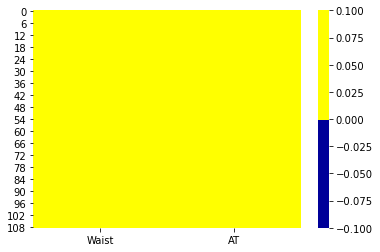

In [13]:
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colours))
data1[data1.isnull().any(axis=1)].shape
data1[data1.isnull().any(axis=1)].head()
#it will give the entire table where there are null values
# if we mention head there it will give only first 5 values in the table
#if we dont mention head it will give entire table where there are null values

In [14]:
data1.isnull()
#it will give False and True values
#beacuse it is difficult to count how many null values and how many non null values are there
#to count the null values we use below code 

,Waist,AT
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
104,False,False
105,False,False
106,False,False
107,False,False


In [15]:
data1.isnull().sum()

Waist    0
AT       0
dtype: int64

In [16]:
#Mean Imputation
mean = data1['Waist'].mean()
print(mean)

91.90183486238533


In [17]:
#Mean Imputation
mean = data1['AT'].mean()
print(mean)

101.89403669724771


# Outlier Detection

<AxesSubplot:>

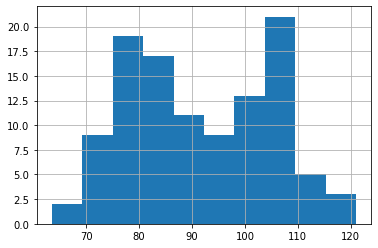

In [19]:
# histogram of Ozone
%matplotlib inline
data1['Waist'].hist()

<AxesSubplot:>

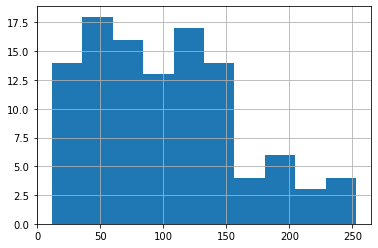

In [20]:
# histogram of Ozone
%matplotlib inline
data1['AT'].hist()

In [21]:
#Descriptive stat
data1['Waist'].describe()

count    109.000000
mean      91.901835
std       13.559116
min       63.500000
25%       80.000000
50%       90.800000
75%      104.000000
max      121.000000
Name: Waist, dtype: float64

In [22]:
#Descriptive stat
data1['AT'].describe()

count    109.000000
mean     101.894037
std       57.294763
min       11.440000
25%       50.880000
50%       96.540000
75%      137.000000
max      253.000000
Name: AT, dtype: float64

# Scatter plot and Correlation analysis

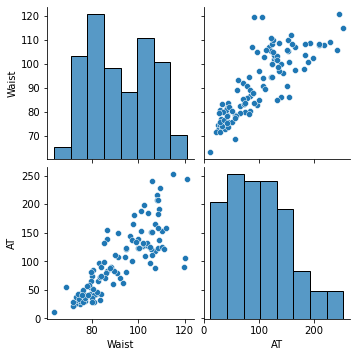

In [23]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data1)

In [24]:
#Correlation
data1.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


# Standardization

In [52]:
from sklearn.preprocessing import StandardScaler

In [54]:
Waist=np.array(data1.Waist).reshape(-1,1)
AT=np.array(data1.AT).reshape(-1,1)
scaler_Waist = StandardScaler().fit(Waist)
rescaled_Waist = scaler_Waist.transform(Waist)
scaler_AT = StandardScaler().fit(AT)
rescaled_AT = scaler_AT.transform(AT)

In [57]:
data_rescaled=pd.DataFrame()
data_rescaled["rescaled_Waist"]=pd.Series(rescaled_Waist)
data_rescaled["rescaled_AT"]=pd.Series(rescaled_AT)

Exception: Data must be 1-dimensional

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Waist', ylabel='Density'>

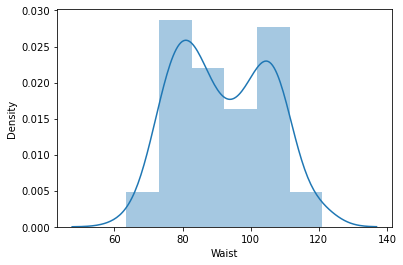

In [25]:
import seaborn as sns
sns.distplot(data1['Waist'])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AT', ylabel='Density'>

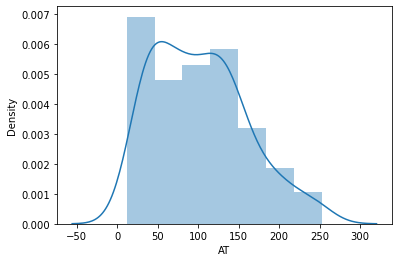

In [26]:
import seaborn as sns
sns.distplot(data1['AT'])

# Fitting a Linear Regression Model

In [29]:
import statsmodels.formula.api as smf
model = smf.ols("AT~Waist",data = data1).fit()

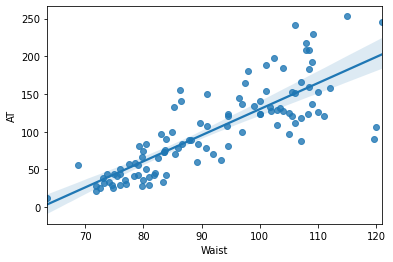

In [31]:
sns.regplot(x="Waist", y="AT", data=data1);

In [32]:
#Coefficients
model.params
#params is parameters

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [33]:
model.summary()
#gives entire model summary
# we can use x.params, y.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           1.62e-27
Time:                        14:08:54   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [35]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6700368930528429, 0.6669531256981966)

# Predict for new data point

In [36]:
newdata=pd.Series([130])

In [37]:
data_pred=pd.DataFrame(newdata,columns=['Waist'])

In [41]:
model.predict(data_pred)

0    233.670233
dtype: float64

In [48]:
pred = model.predict(data1)
actual=data1.AT
errors=actual-pred
import numpy as np
np.sum(errors)

-7.077005648170598e-12

In [50]:
pred = model.predict(data1)
data1['pred']=pd.Series(pred)
actual=data1.AT
errors=actual-pred
data1['errors']=pd.Series(errors)
import numpy as np
np.sum(errors)

-7.077005648170598e-12

In [51]:
data1.head()

,Waist,AT,pred,errors
0,74.75,25.72,42.568252,-16.848252
1,72.60,25.89,35.131704,-9.241704
2,81.80,42.60,66.953210,-24.353210
3,83.95,42.80,74.389758,-31.589758
4,74.65,29.84,42.222366,-12.382366
